In [35]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
import os
import django
warnings.filterwarnings('ignore')



In [36]:
import os
import django

# Correct the project base directory
PROJECT_DIR = r"D:\Project\CanteenManagement"  # Replace with your actual path if different
os.chdir(PROJECT_DIR)  # Change working directory to the project root

# Set up Django environment
os.environ.setdefault("DJANGO_SETTINGS_MODULE", "CanteenManagement.settings")
django.setup()

# Use Django's BASE_DIR from settings.py
from django.conf import settings

# Define datasets path relative to BASE_DIR
DATASETS_DIR = os.path.join(settings.BASE_DIR, "food", "ModelTraining", "datasets")

# Traverse and print file paths
for dirname, _, filenames in os.walk(DATASETS_DIR):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Load datasets
import pandas as pd

food_file = os.path.join(DATASETS_DIR, "Enhanced_Food_Dataset.csv")
ratings_file = os.path.join(DATASETS_DIR, "Food_Ratings_Dataset.csv")

# Load into DataFrames
food = pd.read_csv(food_file)
rating = pd.read_csv(ratings_file)



D:\Project\CanteenManagement\food\ModelTraining\datasets\Enhanced_Food_Dataset.csv
D:\Project\CanteenManagement\food\ModelTraining\datasets\Food_Ratings_Dataset.csv


In [37]:
food.shape

(100, 4)

In [38]:
food.head()

,Food_ID,Name,C_Type,Describe
0,1,Chips,Snacks,Thinly sliced potatoes fried until crispy and ...
1,2,Chiura Tarkari,Breakfast,Beaten rice served with spiced vegetable curry.
2,3,Chole Bhature,Breakfast,Spiced chickpea curry served with deep-fried b...
3,4,Samosa,Snacks,Deep-fried pastry filled with spiced potatoes ...
4,5,Biryani,Lunch,Fragrant rice dish cooked with meat and aromat...


In [39]:
food.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Food_ID   100 non-null    int64 
 1   Name      100 non-null    object
 2   C_Type    100 non-null    object
 3   Describe  100 non-null    object
dtypes: int64(1), object(3)
memory usage: 3.3+ KB


In [40]:
food['C_Type'].nunique()

3

In [41]:
food['C_Type'].unique()

array(['Snacks', 'Breakfast', 'Lunch'], dtype=object)

<Axes: ylabel='C_Type'>

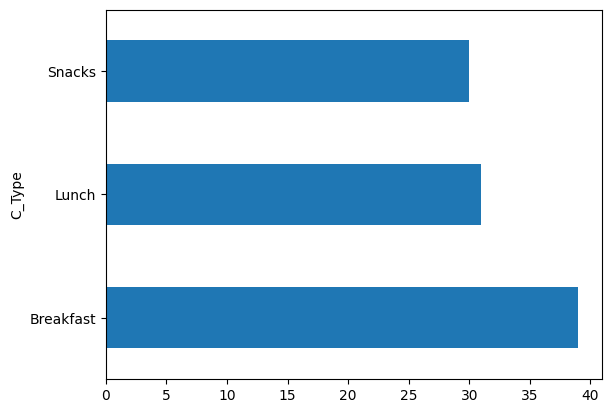

In [42]:
food['C_Type'].value_counts().plot(kind='barh')

In [43]:
food.Describe.nunique()

28

In [44]:
food.duplicated().sum()

np.int64(0)

In [45]:
food.isna().sum()

Food_ID     0
Name        0
C_Type      0
Describe    0
dtype: int64

In [46]:
rating.shape

(100, 3)

In [47]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   User_ID  100 non-null    int64  
 1   Food_ID  100 non-null    int64  
 2   Rating   100 non-null    float64
dtypes: float64(1), int64(2)
memory usage: 2.5 KB


In [48]:
rating.describe()

,User_ID,Food_ID,Rating
count,100.000000,100.000000,100.000000
mean,10.360000,50.500000,3.035000
std,5.876713,29.011492,1.209673
min,1.000000,1.000000,1.000000
25%,5.000000,25.750000,2.000000
50%,9.500000,50.500000,2.900000
75%,16.000000,75.250000,4.025000
max,20.000000,100.000000,5.000000


In [49]:
rating.dropna(inplace=True)

In [50]:
rating[['User_ID' ,'Food_ID']] =rating[['User_ID' ,'Food_ID']].astype('int64')
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   User_ID  100 non-null    int64  
 1   Food_ID  100 non-null    int64  
 2   Rating   100 non-null    float64
dtypes: float64(1), int64(2)
memory usage: 2.5 KB


In [51]:
rating.dropna(axis=0 ,inplace=True)

In [52]:
rating.duplicated().sum()

np.int64(0)

<Axes: xlabel='Rating'>

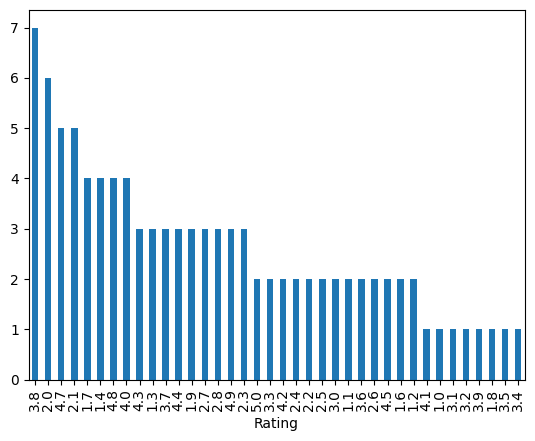

In [53]:
rating.Rating.value_counts().plot(kind='bar')

In [54]:
food_rating = pd.merge(food ,rating ,on='Food_ID')
food_rating.head()

,Food_ID,Name,C_Type,Describe,User_ID,Rating
0,1,Chips,Snacks,Thinly sliced potatoes fried until crispy and ...,4,1.7
1,2,Chiura Tarkari,Breakfast,Beaten rice served with spiced vegetable curry.,7,3.8
2,3,Chole Bhature,Breakfast,Spiced chickpea curry served with deep-fried b...,13,5.0
3,4,Samosa,Snacks,Deep-fried pastry filled with spiced potatoes ...,16,2.1
4,5,Biryani,Lunch,Fragrant rice dish cooked with meat and aromat...,1,2.1


In [55]:
food_rating.isna().sum()

Food_ID     0
Name        0
C_Type      0
Describe    0
User_ID     0
Rating      0
dtype: int64

In [56]:
user_item_matrix = food_rating.pivot_table(index='User_ID', columns='Food_ID', values='Rating').fillna(0)
user_item_matrix

Food_ID,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
User_ID,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,2.1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.7,0.0,0.0,0.0,0.0,0.0,0.0,2.7,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.3
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.3,0.0,0.0,0.0
7,0.0,3.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,1.3,0.0,0.0,0.0,0.0,...,0.0,0.0,1.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,1.4,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [61]:
from sklearn.metrics.pairwise import cosine_similarity

item_similarity = cosine_similarity(user_item_matrix.T)
item_similarity_df = pd.DataFrame(item_similarity, index=user_item_matrix.columns, columns=user_item_matrix.columns)
item_similarity_df


Food_ID,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
Food_ID,,,,,,,,,,,,,,,,,,,,,
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
97,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
98,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
def recommend_items(user_id, user_item_matrix, item_similarity_df, n_recommendations=5):
    # Get the ratings given by the user
    user_ratings = user_item_matrix.loc[user_id]
    user_unrated_items = user_ratings[user_ratings == 0].index.tolist()
    
    # Predict ratings for the items not rated by the user
    item_scores = {}
    for item in user_unrated_items:
        similar_items = item_similarity_df[item]
        user_scores = user_ratings[user_ratings > 0]
        item_scores[item] = sum(user_scores * similar_items[user_scores.index]) / (sum(similar_items[user_scores.index]) + 1e-9)

    # Sort the predicted ratings and return the top N recommendations
    recommended_items = sorted(item_scores.items(), key=lambda x: x[1], reverse=True)[:n_recommendations]
    return [item for item, score in recommended_items]

user_item_matrix = rating.pivot_table(
    index='User_ID', columns='Food_ID', values='Rating', fill_value=0
)
item_similarity = cosine_similarity(user_item_matrix.T)
item_similarity_df = pd.DataFrame(
    item_similarity, index=user_item_matrix.columns, columns=user_item_matrix.columns
)
# Recommend 5 items for a specific user
user_id = 8  # Replace with an actual user ID from your dataset
recommended_food_ids = recommend_items(
    user_id=user_id, 
    user_item_matrix=user_item_matrix, 
    item_similarity_df=item_similarity_df, 
    n_recommendations=5
)

print(f"Recommended Food IDs for User {user_id}: {recommended_food_ids}")


Recommended Food IDs for User 8: [1, 2, 3, 4, 5]


In [72]:
from scipy.sparse.linalg import svds
from scipy.sparse import csr_matrix

user_item_matrix_csr = csr_matrix(user_item_matrix.values)
print(user_item_matrix_csr)
user_item_matrix_csr.shape


<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 100 stored elements and shape (20, 100)>
  Coords	Values
  (0, 4)	2.1
  (0, 39)	3.7
  (0, 60)	2.8
  (0, 87)	2.7
  (1, 30)	3.8
  (1, 43)	3.0
  (1, 91)	4.8
  (2, 17)	4.1
  (2, 66)	1.7
  (2, 79)	3.5
  (3, 0)	1.7
  (3, 7)	2.7
  (3, 12)	2.4
  (3, 16)	4.5
  (3, 45)	2.8
  (3, 61)	4.3
  (3, 73)	3.3
  (3, 81)	3.4
  (3, 99)	1.3
  (4, 11)	1.9
  (4, 49)	1.4
  (4, 50)	3.6
  (4, 52)	2.5
  (4, 65)	1.9
  (4, 68)	4.3
  :	:
  (15, 44)	5.0
  (15, 76)	2.0
  (15, 82)	4.7
  (16, 14)	3.8
  (16, 33)	3.0
  (16, 69)	2.3
  (16, 88)	4.0
  (16, 94)	1.9
  (17, 22)	3.7
  (17, 98)	3.8
  (18, 15)	2.2
  (18, 25)	1.6
  (18, 27)	4.3
  (18, 34)	2.2
  (18, 40)	2.0
  (18, 67)	1.6
  (18, 84)	4.2
  (18, 97)	4.9
  (19, 8)	3.2
  (19, 9)	4.0
  (19, 20)	3.3
  (19, 47)	3.9
  (19, 59)	1.1
  (19, 80)	2.3
  (19, 83)	4.8


(20, 100)

In [74]:
u ,sigma ,vt = svds(user_item_matrix_csr ,k=19)

sigma_diag = np.diag(sigma)
sigma_diag

predicted_rating = np.dot(np.dot(u,sigma_diag) ,vt)
predicted_rating.shape

predicted_rating_df = pd.DataFrame(predicted_rating ,index = user_item_matrix.index ,columns = user_item_matrix.columns)
predicted_rating_df

Food_ID,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
User_ID,,,,,,,,,,,,,,,,,,,,,
1,2.398210e-16,-9.440682e-16,2.537352e-16,9.024318e-17,2.100000e+00,-4.143191e-16,-1.676175e-17,3.808922e-16,4.999741e-16,6.249677e-16,...,6.884695e-16,-6.111997e-16,-3.505777e-16,4.889338e-16,1.318300e-16,3.129407e-16,-1.301195e-16,2.310565e-15,2.355067e-15,1.833926e-16
2,3.832483e-17,-1.291360e-15,-6.088325e-16,-1.805378e-15,-6.120626e-17,2.858059e-16,-1.486887e-16,6.086886e-17,4.177377e-16,5.221721e-16,...,3.092168e-16,4.800000e+00,-6.366650e-16,-2.229081e-16,-4.709867e-16,1.405531e-16,-8.360377e-17,-1.564414e-15,7.168245e-17,2.930723e-17
3,4.736490e-18,3.258613e-16,-4.703102e-16,2.719243e-16,1.769038e-15,-1.992468e-16,-2.978934e-16,7.522661e-18,2.225707e-16,2.782133e-16,...,-1.217446e-15,1.292332e-15,-1.685934e-16,6.083389e-16,2.074228e-16,-5.533845e-16,3.563983e-16,-2.195009e-16,3.078820e-15,3.622022e-18
4,1.700000e+00,-4.078520e-17,3.597267e-16,2.449135e-16,-2.333818e-17,-2.553571e-16,1.955763e-16,2.700000e+00,-9.027332e-16,-9.561985e-16,...,3.429446e-16,-1.988245e-16,-2.187561e-16,1.476201e-15,-1.928339e-16,2.968187e-16,5.482407e-16,1.051795e-15,-2.140768e-15,1.300000e+00
5,-3.022306e-16,1.368372e-15,4.484171e-16,2.768595e-16,1.386584e-16,2.253125e-16,-4.670576e-16,-4.800133e-16,-4.284421e-16,-5.026230e-16,...,-2.124069e-16,1.601153e-15,1.327766e-16,1.876978e-16,2.383125e-16,-9.654859e-17,-4.820395e-17,2.358431e-16,1.229435e-16,-2.311175e-16
6,9.225766e-16,-9.436290e-17,1.513965e-15,5.948845e-16,-6.338134e-16,4.050759e-16,-4.309262e-16,1.465269e-15,3.156883e-16,1.059991e-15,...,2.230858e-16,-4.929358e-16,3.427566e-16,-6.677620e-16,-1.934775e-16,1.014026e-16,1.300000e+00,8.236468e-16,-3.216015e-15,7.054997e-16
7,2.468833e-17,3.800000e+00,2.028473e-15,1.272810e-15,-6.814775e-16,3.131741e-16,1.541740e-16,3.921088e-17,-1.000008e-15,1.017685e-16,...,-1.324389e-15,-1.027943e-15,2.649935e-16,-1.036543e-16,4.103918e-16,-6.019950e-16,-9.657053e-17,-3.751430e-16,-3.216401e-17,1.887931e-17
8,-2.908628e-16,1.020372e-15,6.128591e-16,8.338345e-16,-1.181448e-15,1.300000e+00,-5.080073e-17,-4.619586e-16,-3.919646e-16,-4.899557e-16,...,-5.459708e-16,-3.377739e-15,1.100000e+00,6.810175e-16,-7.291979e-16,-2.481686e-16,2.871983e-16,1.151276e-15,-2.926856e-16,-2.224245e-16
9,-8.704677e-17,2.385645e-16,7.198624e-16,-3.701979e-16,-9.387690e-16,3.023056e-16,1.400000e+00,-1.382508e-16,4.785756e-16,5.982195e-16,...,-3.143774e-16,1.697234e-15,2.557970e-16,5.380523e-16,-1.570247e-16,-1.428988e-16,-9.098090e-17,-1.039457e-15,1.157672e-15,-6.656518e-17


In [76]:
def recommend(userid ,predicted_rating_df = predicted_rating_df ,n =5):
    user_items = predicted_rating_df.iloc[userid,:]
    r = user_items.nlargest(n).index
    r = sorted(r)
    print(r)
    return r

In [77]:
r = recommend(userid = 9)

[22, 49, 52, 87, 91]
